### Pre processing: Adult dataset

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
data= pd.read_csv(r".\adult_clean.csv")
data.info()
data.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education-num   30162 non-null  int64
 4   marital-status  30162 non-null  int64
 5   occupation      30162 non-null  int64
 6   relationship    30162 non-null  int64
 7   race            30162 non-null  int64
 8   sex             30162 non-null  int64
 9   capital-gain    30162 non-null  int64
 10  capital-loss    30162 non-null  int64
 11  hours-per-week  30162 non-null  int64
 12  native-country  30162 non-null  int64
 13  class           30162 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,0,77516,13,7,14,5,1,0,2174,0,40,41,0
1,50,1,83311,13,1,1,1,1,0,0,0,13,41,0
2,38,2,215646,9,2,2,5,1,0,0,0,40,41,0
3,53,2,234721,7,1,2,1,2,0,0,0,40,41,0
4,28,2,338409,13,1,3,2,2,1,0,0,40,1,0


In [8]:
for c in data:
    print(data[c].value_counts())

age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64
workclass
2    22286
1     2499
4     2067
0     1279
5     1074
3      943
6       14
Name: count, dtype: int64
fnlwgt
203488    13
123011    12
164190    12
148995    12
121124    12
          ..
367260     1
266015     1
386940     1
59951      1
186819     1
Name: count, Length: 20263, dtype: int64
education-num
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: count, dtype: int64
marital-status
1    14065
7     9726
2     4214
4      939
6      827
3      370
5       21
Name: count, dtype: int64
occupation
3     4038
10    4030
1     3992
14    3721
5     3584
4     3212
8     1966
6     1572
2     1350
7      989
9      912
11     644
13     143
12       9
Name: count, dtype: int64
relationship
1    1

#### Plots

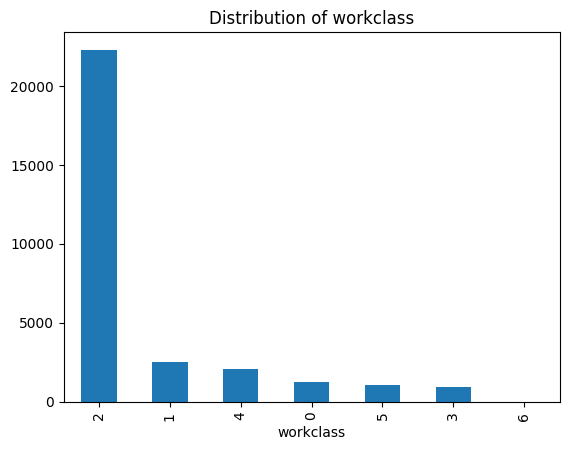

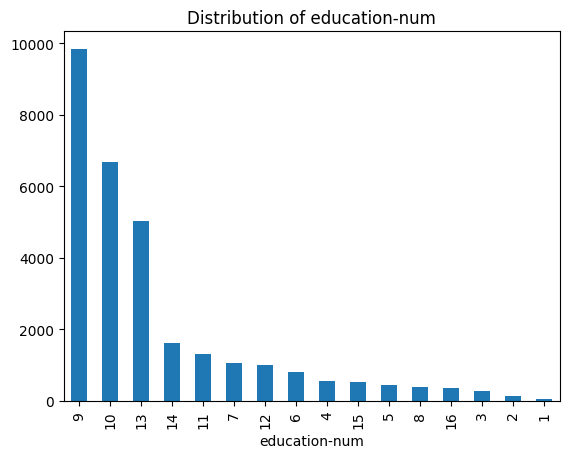

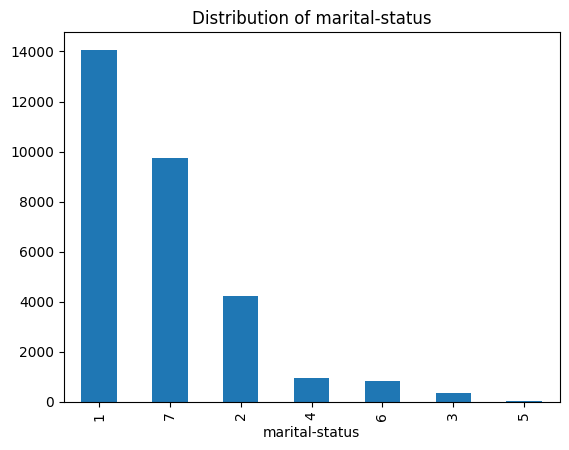

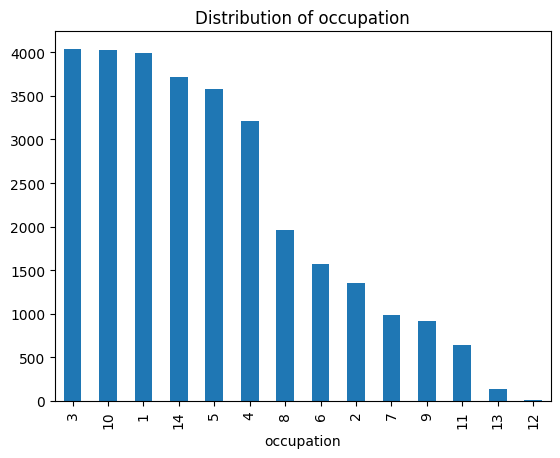

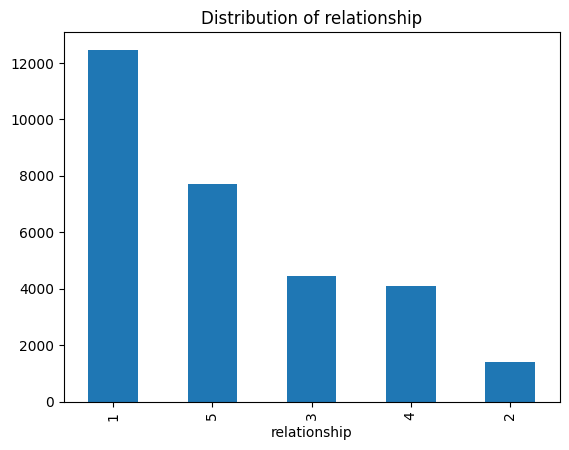

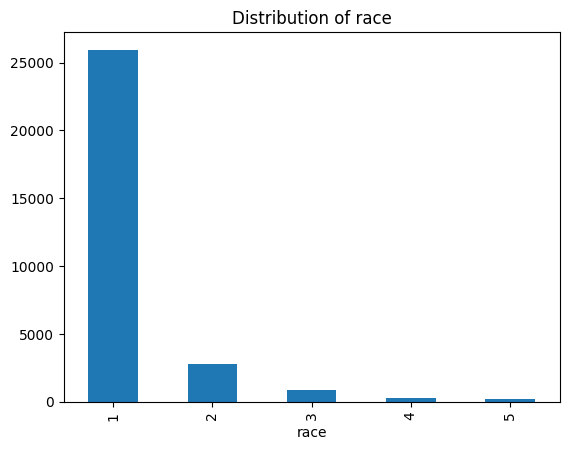

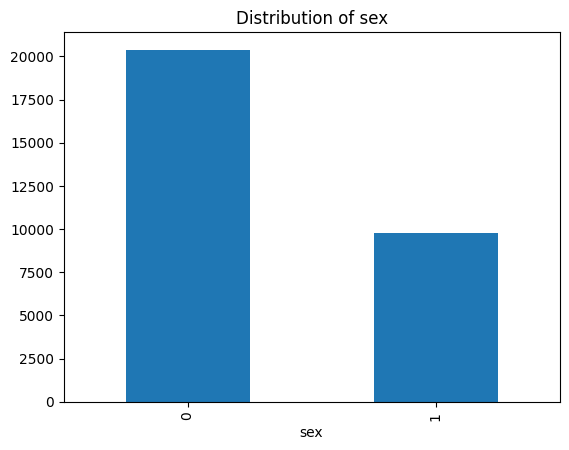

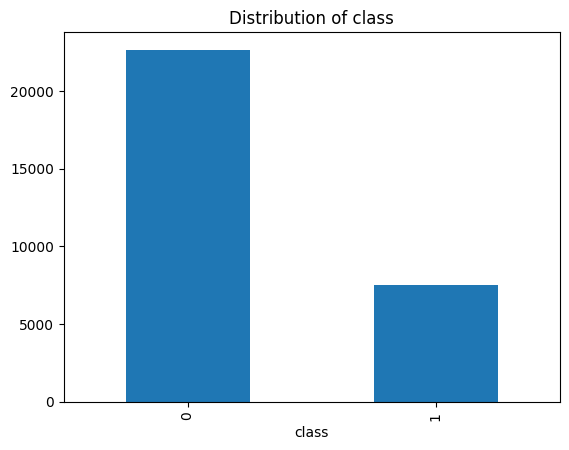

In [6]:
num= ['age', 'fnlwgt', 'capital-gain', 'capital-loss' ,'native-country', 'hours-per-week']

cats = [c for c in data if c not in num]

for c in cats:
    data[c].value_counts().plot(kind= 'bar',
           title= f'Distribution of {c}')
    plt.show()

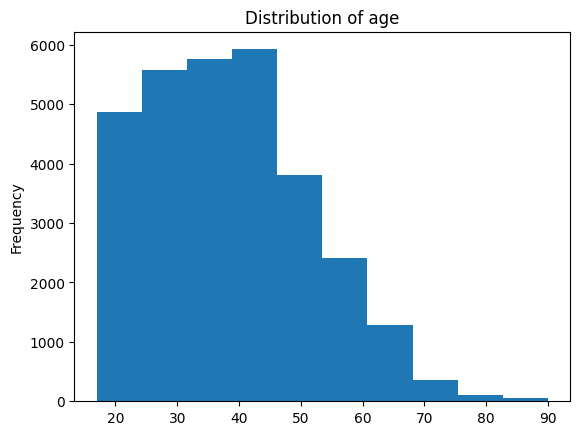

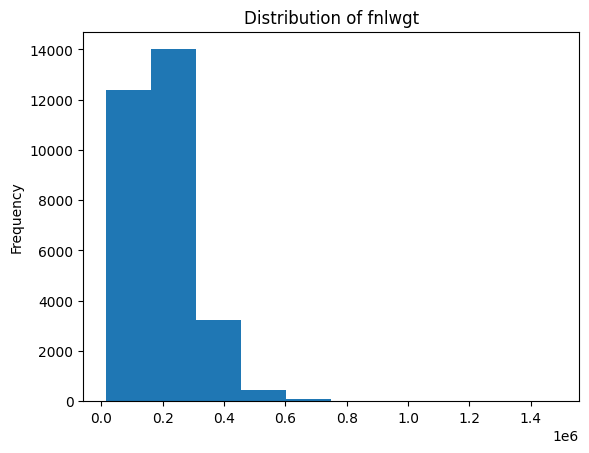

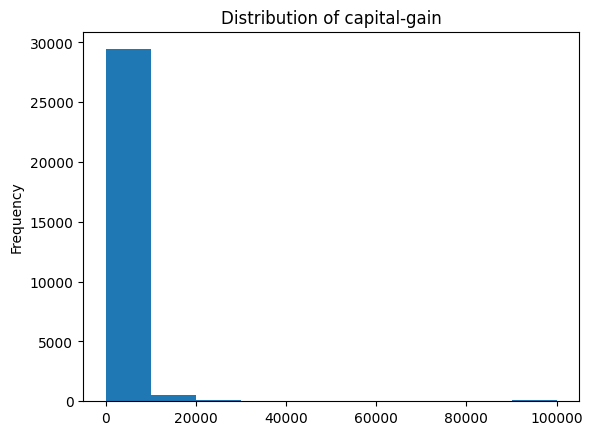

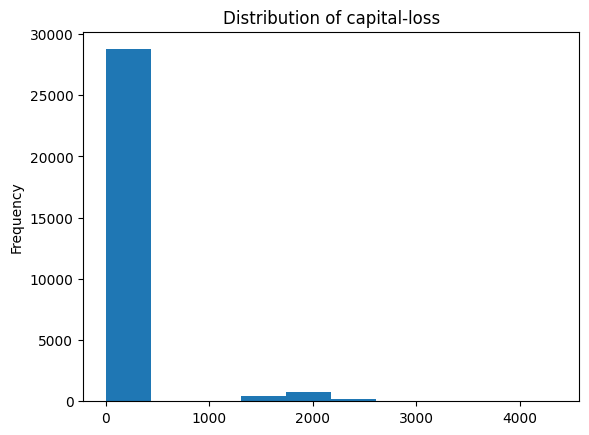

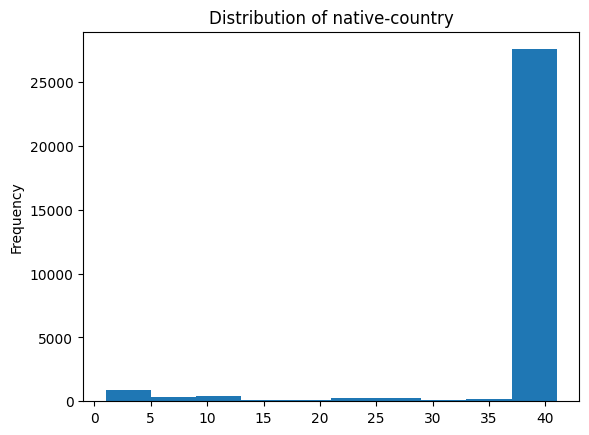

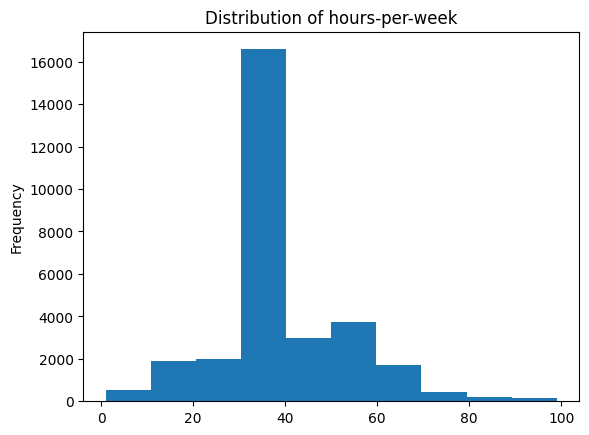

In [7]:
for c in data[num]:
    data[c].plot(kind= 'hist',
                                title= f'Distribution of {c}')
    
    plt.show()


### Processing native-country

In [6]:
region_map= pd.read_excel(r".\native-country map.xlsx")
data['native-country'] = data['native-country'].str.strip()
region_map['region'] = region_map['region'].str.strip()


In [8]:
merged= data.merge(region_map, left_on="native-country", right_on="original", how='left')

merged= merged.drop(columns= ['original', 'native-country', 'education', 'fnlwgt']) 
merged.head(n=5)


,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,region
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K,North America
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K,North America
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K,North America
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K,North America
4,18,Undisclosed,10,Never-married,Undisclosed,Own-child,White,Female,0,0,30,<=50K,North America


In [9]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   capital-gain     48842 non-null  int64 
 9   capital-loss     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  income           48842 non-null  object
 12  region           48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [ ]:
order= [c for c in merged.columns if c != 'income'] + ['income']

df = merged[order]
income_map = {'<=50K':0, '>50K': 1}

df['income'] = df['income'].map(income_map)



,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,North America,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,North America,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,North America,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,North America,1
4,18,Undisclosed,10,Never-married,Undisclosed,Own-child,White,Female,0,0,30,North America,0


In [12]:
df.to_csv(r".\adult_processed.csv", index= False)